# MOHID visualisation tools

In [199]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [183]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cmocean
%matplotlib inline

## How to Parse time into datetime64 string format

In [2]:
from datetime import datetime, timedelta
from dateutil.parser import parse

In [8]:
def to_datetime64(time):
    """Convert string to string in datetime64[s] format
    :arg time: string
    :return datetime64: str in datetime64[s] format
    """
    time = parse(time) # parse to datetime format
    # now just take care of formatting
    year, month, day, hour, minute, second = str(time.year), str(time.month), str(time.day), str(time.hour), str(time.minute), str(time.second)
    if len(month) < 2:
        month = '0' + month
    if len(day) < 2:
        day = '0' + day
    if len(hour) < 2:
        hour = '0' + hour
    if len(minute) < 2:
        minute = '0' + minute
    if len(second) < 2:
        second = '0' + second
    datetime64 = '{}-{}-{}T{}:{}:{}'.format(year, month, day, hour, minute, second)
    return datetime64

### Usage:

In [9]:
to_datetime64('1 Jan 2016')

'2016-01-01T00:00:00'

<h2>Generate heat maps of vertical velocities</h2>

<h3>Getting depth slices</h3>

In [13]:
# load a profile
sog2015 = xr.open_dataset('Vertical_velocity_profiles/sog2015.nc')

In [14]:
sog2015

<xarray.Dataset>
Dimensions:        (depthw: 40, time_counter: 8760)
Coordinates:
    nav_lat        float32 ...
    nav_lon        float32 ...
  * depthw         (depthw) float32 0.0 1.0000012 2.0000064 ... 401.06845 428.0
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2015-01-01T00:30:00 ... 2015-12-31T23:30:00
Data variables:
    vovecrtz       (time_counter, depthw) float32 ...

In [25]:
# slice by layer index
sog2015.vovecrtz.isel(depthw = slice(0,11))

<xarray.DataArray 'vovecrtz' (time_counter: 8760, depthw: 11)>
array([[ 2.015907e-08,  9.334536e-05,  1.859639e-04, ...,  4.380373e-04,
         4.100798e-04,  4.141573e-04],
       [ 1.434209e-08, -1.009200e-04, -1.993904e-04, ..., -1.955389e-04,
        -1.616352e-04, -1.274053e-04],
       [ 1.205287e-08,  6.620213e-05,  1.533732e-04, ...,  2.812206e-04,
         2.128863e-04,  1.562124e-04],
       ...,
       [ 1.489798e-08,  3.695256e-05, -2.405636e-05, ..., -2.805775e-04,
        -2.289577e-04, -1.890119e-04],
       [ 1.440403e-08,  7.689399e-05, -1.035418e-05, ..., -7.272492e-06,
         4.812049e-05,  6.607056e-05],
       [ 1.473936e-08,  3.177442e-05, -2.119394e-05, ..., -6.085024e-05,
        -6.450491e-05, -8.499614e-05]], dtype=float32)
Coordinates:
    nav_lat        float32 ...
    nav_lon        float32 ...
  * depthw         (depthw) float32 0.0 1.0000012 ... 9.001736 10.003407
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) da

In [26]:
# slice explicitly by layer depth

# print depth with corresponding index
for i in zip(range(40), sog2015.depthw.values):
    print(i)

(0, 0.0)
(1, 1.0000012)
(2, 2.0000064)
(3, 3.0000193)
(4, 4.0000467)
(5, 5.000104)
(6, 6.000217)
(7, 7.0004406)
(8, 8.000879)
(9, 9.001736)
(10, 10.003407)
(11, 11.006662)
(12, 12.013008)
(13, 13.025366)
(14, 14.049429)
(15, 15.096255)
(16, 16.187304)
(17, 17.364035)
(18, 18.705973)
(19, 20.363474)
(20, 22.613064)
(21, 25.937412)
(22, 31.101034)
(23, 39.11886)
(24, 50.963238)
(25, 67.05207)
(26, 86.96747)
(27, 109.73707)
(28, 134.34593)
(29, 160.02956)
(30, 186.30528)
(31, 212.89656)
(32, 239.65305)
(33, 266.4952)
(34, 293.3816)
(35, 320.29077)
(36, 347.2116)
(37, 374.1385)
(38, 401.06845)
(39, 428.0)


In [23]:
sog2015.vovecrtz.sel(depthw = slice(0.0, 10.003407))

<xarray.DataArray 'vovecrtz' (time_counter: 8760, depthw: 11)>
array([[ 2.015907e-08,  9.334536e-05,  1.859639e-04, ...,  4.380373e-04,
         4.100798e-04,  4.141573e-04],
       [ 1.434209e-08, -1.009200e-04, -1.993904e-04, ..., -1.955389e-04,
        -1.616352e-04, -1.274053e-04],
       [ 1.205287e-08,  6.620213e-05,  1.533732e-04, ...,  2.812206e-04,
         2.128863e-04,  1.562124e-04],
       ...,
       [ 1.489798e-08,  3.695256e-05, -2.405636e-05, ..., -2.805775e-04,
        -2.289577e-04, -1.890119e-04],
       [ 1.440403e-08,  7.689399e-05, -1.035418e-05, ..., -7.272492e-06,
         4.812049e-05,  6.607056e-05],
       [ 1.473936e-08,  3.177442e-05, -2.119394e-05, ..., -6.085024e-05,
        -6.450491e-05, -8.499614e-05]], dtype=float32)
Coordinates:
    nav_lat        float32 ...
    nav_lon        float32 ...
  * depthw         (depthw) float32 0.0 1.0000012 ... 9.001736 10.003407
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) da

### Getting time slices using parsing

In [35]:
# this is where to_datetime64 comes in handy
# getting the first week in january
sog2015.sel(time_counter = slice(to_datetime64('1 jan 2015'), to_datetime64('7 jan 2015')))

<xarray.Dataset>
Dimensions:        (depthw: 40, time_counter: 144)
Coordinates:
    nav_lat        float32 ...
    nav_lon        float32 ...
  * depthw         (depthw) float32 0.0 1.0000012 2.0000064 ... 401.06845 428.0
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2015-01-01T00:30:00 ... 2015-01-06T23:30:00
Data variables:
    vovecrtz       (time_counter, depthw) float32 ...

### Slicing by time and depth at the same time

In [42]:
slice_example = sog2015.vovecrtz.sel(time_counter = slice(to_datetime64('1 jan 2015'), to_datetime64('7 jan 2015'))).isel(depthw = slice(0,11))

In [43]:
slice_example

<xarray.DataArray 'vovecrtz' (time_counter: 144, depthw: 11)>
array([[ 2.015907e-08,  9.334536e-05,  1.859639e-04, ...,  4.380373e-04,
         4.100798e-04,  4.141573e-04],
       [ 1.434209e-08, -1.009200e-04, -1.993904e-04, ..., -1.955389e-04,
        -1.616352e-04, -1.274053e-04],
       [ 1.205287e-08,  6.620213e-05,  1.533732e-04, ...,  2.812206e-04,
         2.128863e-04,  1.562124e-04],
       ...,
       [ 1.414119e-09, -1.336892e-05, -2.927666e-06, ..., -1.689427e-04,
        -1.873036e-04, -1.822602e-04],
       [ 1.210295e-09,  1.821388e-06,  5.384516e-05, ...,  3.096233e-04,
         2.280597e-04,  1.459148e-04],
       [ 1.432961e-09,  2.150906e-04,  4.106119e-04, ...,  8.041392e-04,
         7.447489e-04,  6.472999e-04]], dtype=float32)
Coordinates:
    nav_lat        float32 ...
    nav_lon        float32 ...
  * depthw         (depthw) float32 0.0 1.0000012 ... 9.001736 10.003407
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) dat

### Plotting the slice

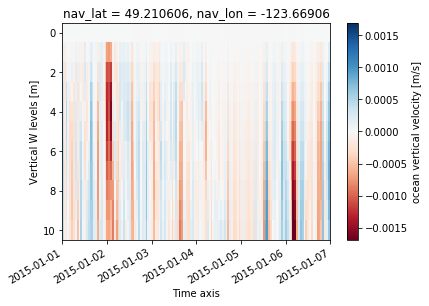

In [51]:
slice_example.T.plot(cmap = 'RdBu') # transposed to have depth on y axis. cmap specified as RdBu.
plt.gca().invert_yaxis()

<h3>Extracting the data you just visualised</h3>

In [3]:
a_slice.data()

<xarray.DataArray 'vovecrtz' (time_counter: 12, depthw: 6)>
array([[ 2.127669e-09,  3.561978e-05,  7.383771e-05,  1.174551e-04,
         1.712857e-04,  2.309897e-04],
       [ 2.972430e-09, -2.676817e-05, -5.280766e-05, -7.768244e-05,
        -1.007696e-04, -1.227476e-04],
       [ 2.911832e-09, -4.990362e-05, -9.872800e-05, -1.459655e-04,
        -1.918735e-04, -2.370951e-04],
       [ 2.292880e-09, -4.836560e-05, -9.301616e-05, -1.313915e-04,
        -1.621696e-04, -1.850976e-04],
       [ 2.110558e-09, -8.227108e-05, -1.624838e-04, -2.391832e-04,
        -3.120320e-04, -3.848440e-04],
       [ 2.207844e-09, -3.885835e-05, -7.753752e-05, -1.153559e-04,
        -1.477138e-04, -1.402367e-04],
       [ 2.345612e-09,  2.269702e-05,  4.577079e-05,  7.020041e-05,
         1.002583e-04,  1.433576e-04],
       [ 2.514626e-09,  3.088054e-05,  6.054356e-05,  8.814631e-05,
         1.132800e-04,  1.354900e-04],
       [ 2.185586e-09, -5.488929e-05, -1.105698e-04, -1.675093e-04,
        -2.26047

## Plotting the trend of the depth of maximum vertical change

In [83]:
def find_bottom(array):
    """Find the bottom depth layer index
    :arg array: one dimesional array (profile at giventime stamp)
    :returns bottom: int, 1 + index of sea floor layer
    """
    i=-1
    for value in np.flip(array):
        if value != 0:
            bottom = 39-i
            return bottom
        else:
            i=i+1

In [140]:
def max_delta(depths, truncated_array):
    """return raw plot data for depth of maximum delta
    """
    # time is axis 0, depth is axis 1
    difference = np.abs(np.diff(truncated_array, axis=1))
    data = (depths[np.argmax(difference, axis=1)])
    return data, difference

In [141]:
depths = sog2015.depthw.values
array = sog2015.vovecrtz.sel(time_counter = slice(convert_timestamp('1 Jan 2015'), convert_timestamp('7 Jan 2015')))
bottom_index = find_bottom(array[0].values)

In [142]:
truncated_array = array.isel(depthw = slice(0,bottom_index)).values
times = array.time_counter.values

In [143]:
delta, difference = max_delta(depths,truncated_array)

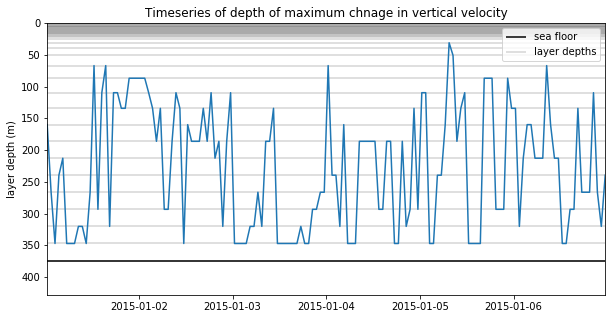

In [165]:
fig = plt.figure(figsize=(10,5))
plt.plot(times, delta)
plt.xlim(times[0], times[-1])
plt.ylim(depths[0], depths[-1])
plt.hlines(depths[bottom_index-1], times[0], times[-1], label = 'sea floor')
plt.hlines(depths[0:bottom_index], times[0], times[-1], linewidth = 0.25, label='layer depths')
plt.gca().invert_yaxis()
plt.ylabel('layer depth (m)')
plt.title('Timeseries of depth of maximum chnage in vertical velocity')
plt.legend()

## Salinity profiles with shaded range region

In [349]:
import seaborn as sns

In [372]:
palette = sns.color_palette("Reds", n_colors = 14)

In [166]:
sal_sog2015 = xr.open_dataset('salinity_profiles/salinity_sog2015.nc')

In [272]:
A = sal_sog2015.sel(time_counter = slice(to_datetime64('1 Jan 2015'),to_datetime64('8 Jan 2015')))

Text(0.5, 1.0, 'Salinity profiles over a week, showing profile every 12th hour')

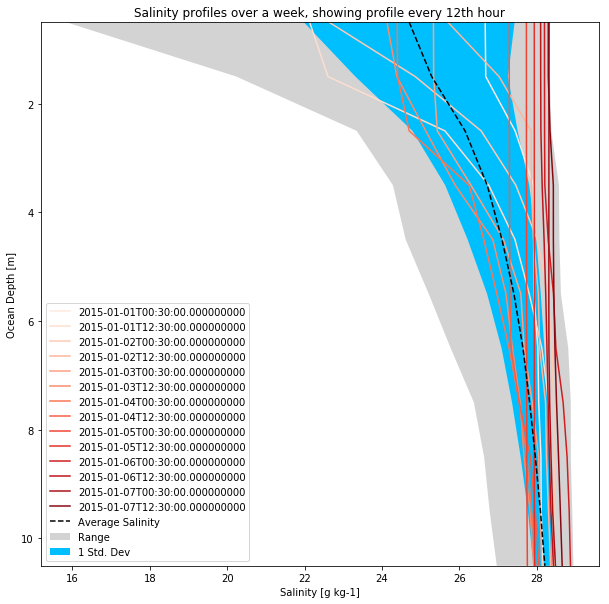

In [374]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111)
depths = A.deptht.values.T
#bottom = find_bottom(A.isel(time_counter= 0).vosaline.values)
bottom = 11
try:
    for i in range(14):
        plt.plot(A.vosaline.isel(time_counter = 12*i).values[0: bottom],depths[0: bottom], label = A.time_counter.values[12*i], color = palette[i])
except IndexError:
    pass
# find the fill_between values
low, high = np.min(A.vosaline.values,axis = 0)[0: bottom], np.max(A.vosaline.values, axis=0)[0:bottom]
mean = np.average(A.vosaline.values,axis = 0)[0: bottom]
stddev = np.std(A.vosaline.values,axis = 0)[0: bottom]
plt.plot(mean,depths[0: bottom], 'k--',label = 'Average Salinity')
plt.fill_betweenx(depths[0:bottom],low, high, facecolor = 'lightgray', label = 'Range')
plt.fill_betweenx(depths[0:bottom], mean-stddev, mean+stddev,facecolor = 'deepskyblue', label = '1 Std. Dev')
ax.set_ylim(depths[0], depths[bottom-1])
plt.gca().invert_yaxis()
plt.legend(loc='lower left')
plt.ylabel('Ocean Depth [m]')
plt.xlabel('Salinity [g kg-1]')
plt.title('Salinity profiles over a week, showing profile every 12th hour')

<h2>Heat maps of Salinity</h2>

In [193]:
salinity_slice = sal_sog2015.sel(time_counter=slice(to_datetime64('1 Jan 2015'), to_datetime64('7 jan 2015')))

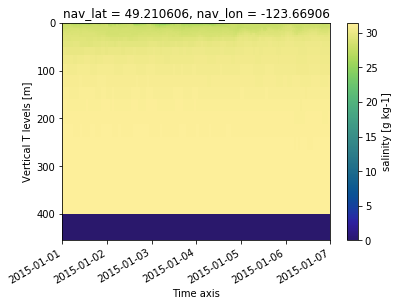

In [195]:
salinity_slice.vosaline.T.plot(cmap = cmocean.cm.haline)
plt.gca().invert_yaxis()

## Difference between surface and botttom salinity

In [ ]:
salinity_slice = sal_sog2015.sel(time_counter=slice(to_datetime64('1 Jan 2015'), to_datetime64('7 jan 2015')))

In [170]:
bottom = find_bottom(sal_sog2015.vosaline.isel(time_counter=0).values)

Text(0, 0.5, '(Surface - Bottom Salinity) [g kg-1]')

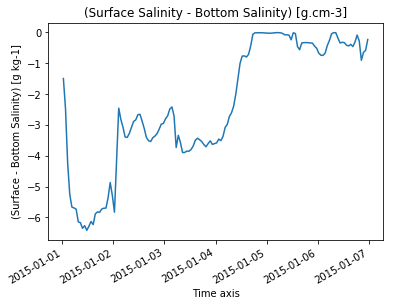

In [340]:
# plot the difference between the surface and bottom salinity
diff = salinity_slice.isel(deptht = 0) - salinity_slice.isel(deptht = bottom-1)
diff.vosaline.plot()
plt.title('(Surface Salinity - Bottom Salinity) [g.cm-3]')
plt.ylabel('(Surface - Bottom Salinity) [g kg-1]')

In [ ]:
depths = sal_sog2015.deptht.values
array = sal_sog2015.vosaline.sel(time_counter = slice(convert_timestamp('1 Jan 2015'), convert_timestamp('7 Jan 2015')))
bottom_index = find_bottom(array[0].values)
truncated_array = array.isel(deptht = slice(0,bottom_index)).values
times = array.time_counter.values
delta, difference = max_delta(depths,truncated_array)
fig = plt.figure(figsize=(10,5))
plt.plot(times, delta)
plt.xlim(times[0], times[-1])
plt.ylim(depths[0], depths[-1])
plt.hlines(depths[bottom_index-1], times[0], times[-1], label = 'sea floor')
plt.hlines(depths[0:bottom_index], times[0], times[-1], linewidth = 0.25, label='layer depths')
plt.gca().invert_yaxis()
plt.ylabel('layer depth (m)')
plt.title('Timeseries of depth of maximum chnage in ')
plt.legend()